#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [17]:
## Reading the image plaksha_Faculty.jpg
image = cv2.imread("plaksha_Faculty.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
  
# Applying the face detection method on the grayscale image
faces_rect = face_cascade.detectMultiScale(gray, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(image, text, (x, y-10), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


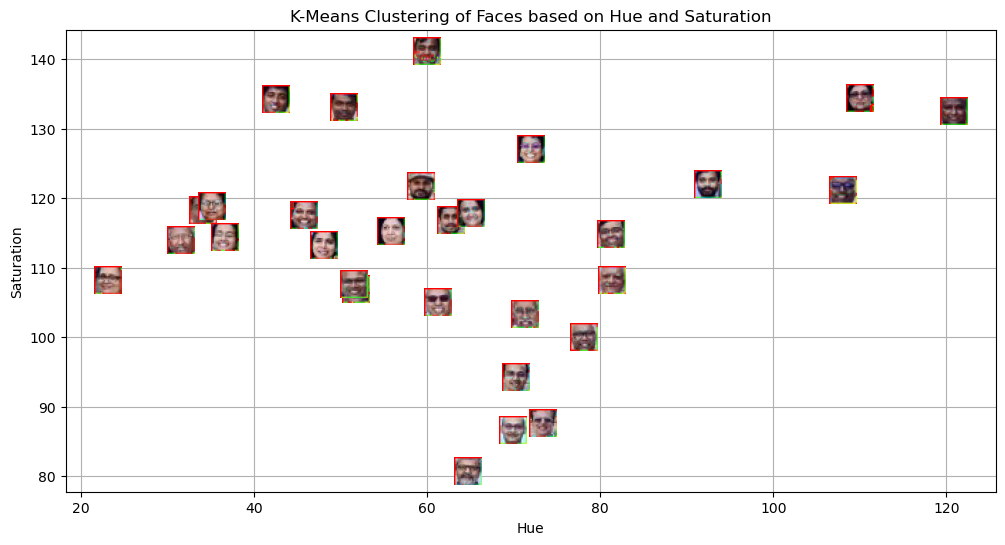

In [18]:
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("K-Means Clustering of Faces based on Hue and Saturation")

## Put grid
plt.grid(True)

## show the plot
plt.show()

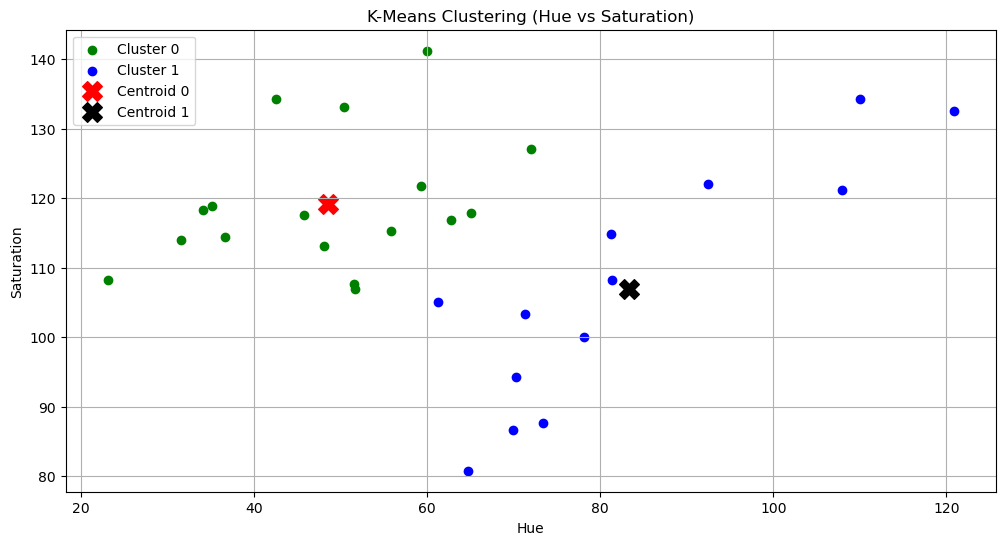

In [19]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = cluster_0_points.mean(axis=0)
centroid_1 = cluster_1_points.mean(axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='black', marker='X', s=200, label='Centroid 1')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("K-Means Clustering (Hue vs Saturation)")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.show()


In [20]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(
    cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY),
    1.1,
    5
)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Template Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

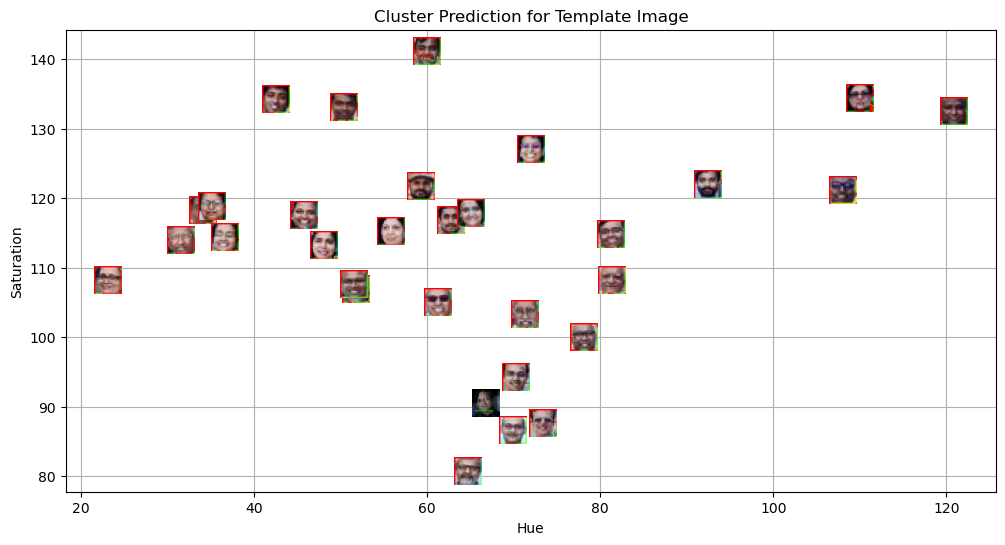

In [21]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Cluster Prediction for Template Image")

## Add grid
plt.grid(True)

## show plot
plt.show()


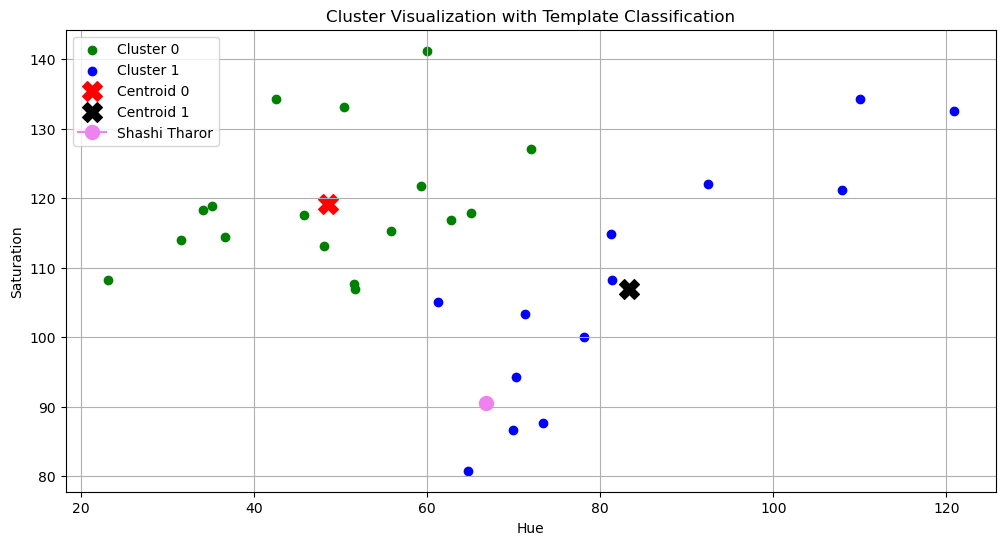

In [22]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = cluster_0_points.mean(axis=0)
centroid_1 = cluster_1_points.mean(axis=0)
plt.scatter(centroid_0[0], centroid_0[1], marker='X', s=200, c='red', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='X', s=200, c='black', label='Centroid 1')  ## plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Shashi Tharor')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Cluster Visualization with Template Classification")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## show the plot
plt.show()

                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

The common distance metrics used in distance based classigication algorithms include methods like: L2 norm Euclidean Distance, Mahalanobis Distance, L1 Norm Manhattan Distance, Minkowski Distance, Cosine Distance, L Infinity Norm Chebyshev Distance, Hamming Distance.

#### 2. What are some real-world applications of distance-based classification algorithms? 

Distance based classification algorithms are used majorly in real world applications like: Face Recognition, Image Classification, Text Detection, Fraud detection, etcetra 






#### 3. Explain various distance metrics. 

Euclidean Distance:
Represents the shortest straight-line distance between two vectors Most widely used metric in K-Means and K-NN, being easy to compute but sensitive to feature scale but it does not account for data variance.

Mahalanobis Distance:
Measures distance between a point and a distribution by accounting for variance and feature correlation using the covariance matrix. It is scale invariant (unitless) and is useful for outlier detection.

Manhattan Distance (L1 Norm):
Distance measured along coordinate axes. It uses the sum of absolute differences between features and often works better in high dimensional sparse spaces and is less sensitive to outliers.

Chebyshev Distance (L∞ Norm):
Its the maximum absolute difference across all feature dimensions and is used when movement is restricted along axes.

Minkowski Distance:
Generalized form of distance metric.
p = 1 => Manhattan; p = 2 => Euclidean; p = infinity => Chebyshev;
Useful when experimenting with different norms.

Cosine Distance:
Measures angle between vectors rather than magnitude being useful when orientation matters more than size. This is very common in text mining and recommendation systems and works well in high dimensional spaces.

Hamming Distance:
Counts number of differing positions between two binary vectors. It is widely used in digital communication and error detection and is suitable for categorical or binary data. It also is simple and computationally efficient.



#### 4. What is the role of cross validation in model performance? 

Cross validation is used to evaluate how well a model works on unseen data by repeatedly splitting the main dataset into training and validation sets (80-20 or 60-40 split normally). It provides a more reliable estimate of model performance than what a single train test split would give. It also helps in selecting optimal hyperparameters (such as K in K-NN) and reduces overfitting. Overall, it ensures unbiased performance assessment.





#### 5. Explain variance and bias in terms of KNN? 

In K-Nearest Neighbors (KNN), bias and variance depend on the value of K.
When K is small (example: K = 1), the model closely follows the training data, making it highly sensitive to noise... this leads to low bias but high variance (overfitting).
When K is large, the model averages over many neighbors, producing smoother decision boundaries which results in high bias but low variance (underfitting).
=> Choosing K such based on the trad off between bias and variance is important based on the application you are working on